# Support Vector Machine on the MNIST dataset
This script loads the MNIST dataset using the torchvision library and trains an SVM model to classify handwritten digits.  
The model's performance is evaluated using accuracy.

At first SVM is tested at the largest possible bath (this method is limited by computational resourses), then grid search is performed. Model with chosen hiperparameters is trained again and evaluated at test set.

Then PCA dcomposition is proceeded, and after grid search model is evaluated again.

In [1]:
%cd /opt/notebooks/basic_of_ml_image_classification
!pip install torch
!pip install torchvision
!pip install scikit-learn

/opt/notebooks/basic_of_ml_image_classification
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.0/888.0 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 33.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 55.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 MB 14.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 25.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/9

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

### Loading MNIST dataset

In [3]:
#define transforms (0-255 -> 0-1 with normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

#load data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 13.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 383kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.58MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.59MB/s]


In [3]:
# divide into bathes
train_loader = DataLoader(
    train_dataset,
    batch_size=20000,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=4000,
    shuffle=True
)

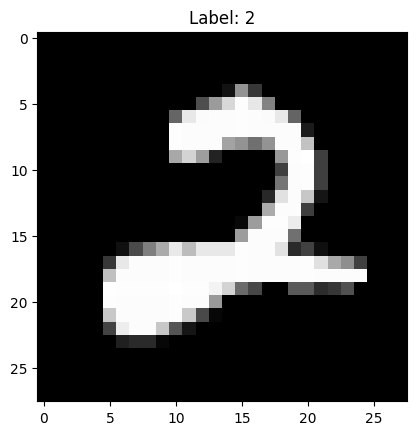

In [10]:
images, labels = next(iter(train_loader))

plt.imshow(images[1].squeeze(), cmap='gray')
plt.title(f"Label: {labels[1]}")
plt.show()

### SVM at  one bath (20 000 samples)

In [5]:
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

In [28]:
#convert numpy and flatten
X_train = train_images.view(len(train_images), -1).numpy()
y_train = train_labels.numpy()

X_test = test_images.view(len(test_images), -1).numpy()
y_test = test_labels.numpy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train

In [12]:
svm = SVC(kernel='linear', C=2, gamma=0.05)
svm.fit(X_train, y_train)

SVC(C=2, gamma=0.05, kernel='linear')

Test

Accuracy: 0.921


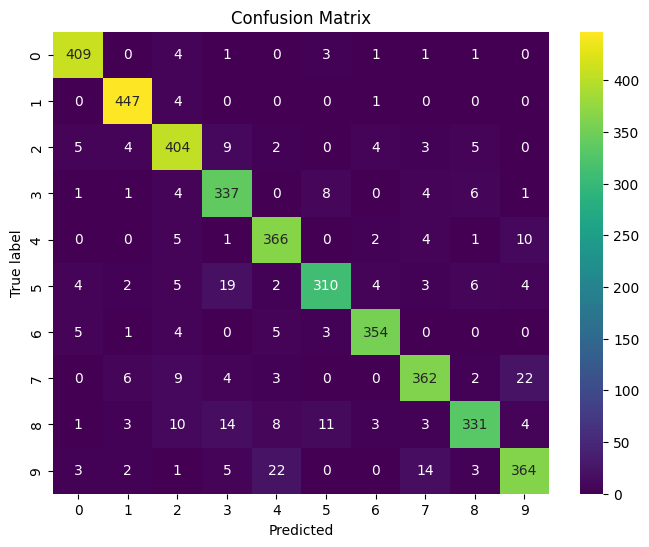

In [15]:
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

### Grid search for the best hiperparameters

In [8]:
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='linear')

param_grid = {
    'C': [0.1, 1, 2, 5, 10],
    'gamma': [0.01, 0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'gamma': 0.01}
Best cross-validation accuracy: 0.916700249595981


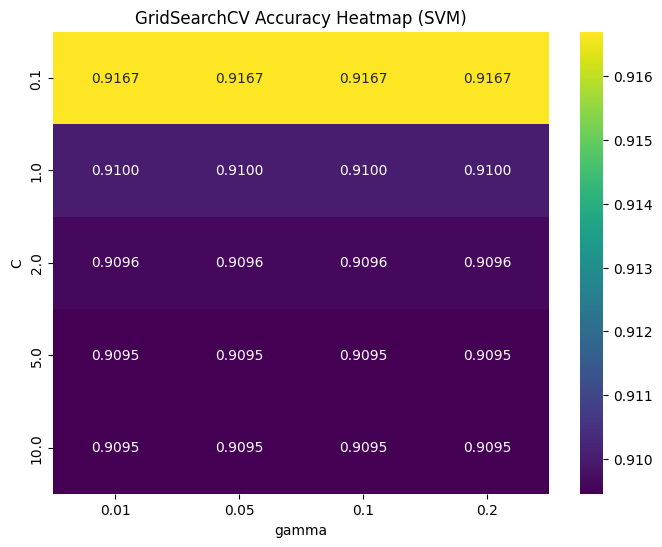

In [9]:
results = grid_search.cv_results_

df = pd.DataFrame({
    'C': results['param_C'].data.astype(float),
    'gamma': results['param_gamma'].data.astype(float),
    'mean_test_score': results['mean_test_score']
})

heatmap_data = df.pivot(index='C', columns='gamma', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis")
plt.title("GridSearchCV Accuracy Heatmap (SVM)")
plt.xlabel("gamma")
plt.ylabel("C")
plt.show()

**Conclusion**: best parameters are `C = 0.1` and `gamma` doesn't matter bc of linear kernel 

### Model for chosen hiperparameters

Accuracy: 0.921


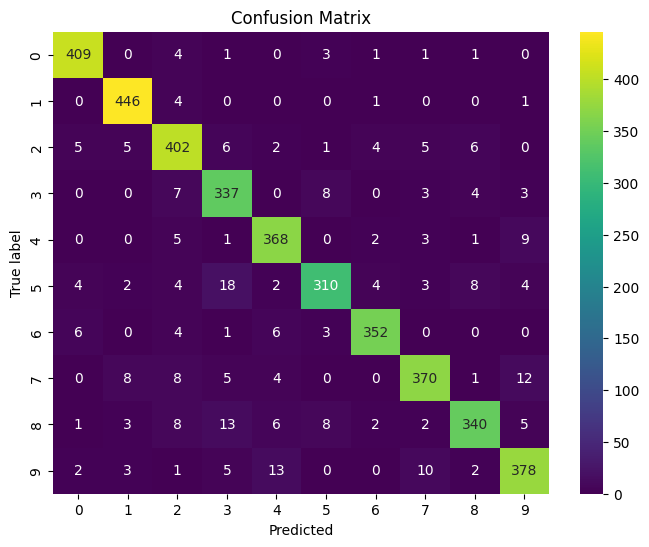

In [16]:
svm2 = SVC(kernel='linear', C=0.1)
svm2.fit(X_train, y_train)

y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

y_pred = svm2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

### PCA
when we use less features, we can include more data:)

In [37]:
pca = PCA(n_components=0.95)    

pca.fit(X_train)

X_train_pca1 = pca.transform(X_train)
X_test_pca1  = pca.transform(X_test)

print("Number of components after PCA:", pca.n_components_)
print("(before:784)")

Number of components after PCA: 304
(before:784)


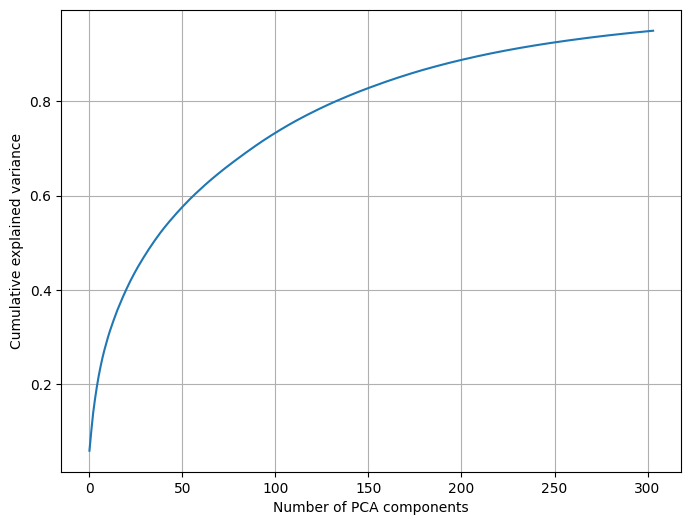

In [22]:
cum_var = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(cum_var)
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.show()

Accuracy: 0.92925


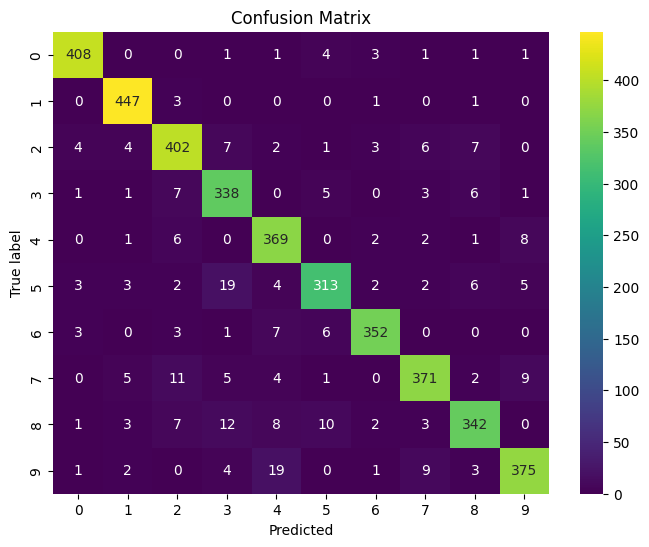

In [24]:
svm_pca = SVC(kernel='linear', C=0.1)
svm_pca.fit(X_train_pca, y_train)

y_pred = svm_pca.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [42]:
svm = SVC(kernel='linear')

param_grid = {
    'C': [0.1, 1, 2, 5, 10],
}

grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train_pca1, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'C': 0.1}
Best cross-validation accuracy: 0.9213001321131062


2x more data (adding next bath from train loader)

In [29]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

In [32]:
extra_X = images.numpy().reshape(len(images), -1)
extra_y = labels.numpy()

X_train_pca = np.concatenate([X_train, extra_X], axis=0)
y_train_pca = np.concatenate([y_train, extra_y], axis=0)

print(X_train_pca.shape, y_train_pca.shape)

(40000, 784) (40000,)


In [34]:
pca = PCA(n_components=0.95)    

pca.fit(X_train)

X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca  = pca.transform(X_test_pca)

print("Number of components after PCA:", pca.n_components_)

Number of components after PCA: 197


Accuracy: 0.93725


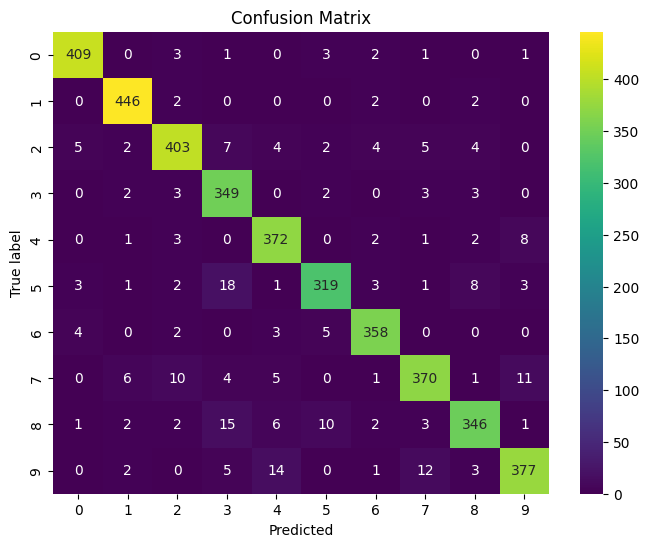

In [36]:
svm_pca2 = SVC(kernel='linear', C=0.1)
svm_pca2.fit(X_train_pca, y_train_pca)

y_pred = svm_pca2.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()